# Neural Network for Digit Recognition

This notebook implements a neural network to recognize handwritten digits using the MNIST dataset. The network uses one hidden layer with ReLU activation and an output layer with softmax activation.


In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
# Load and preprocess the data
data = pd.read_csv('C:/Users/anupp/OneDrive/Documents/Python/Projectsss/digit-recognizer/train.csv')  
data = np.array(data)
num_samples, num_features = data.shape
np.random.shuffle(data)

# Split data into training and validation sets
validation_data = data[0:1000].T
validation_labels = validation_data[0]
validation_features = validation_data[1:num_features] / 255.

training_data = data[1000:num_samples].T
training_labels = training_data[0]
training_features = training_data[1:num_features] / 255.
_, num_training_samples = training_features.shape


![alt text](<Screenshot 2024-11-29 015505.png>)



In [12]:
# Initialize neural network parameters
def initialize_parameters():
    hidden_layer_weights = np.random.rand(10, 784) - 0.5
    hidden_layer_biases = np.random.rand(10, 1) - 0.5
    output_layer_weights = np.random.rand(10, 10) - 0.5
    output_layer_biases = np.random.rand(10, 1) - 0.5
    return hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases

# Activation functions
def relu(linear_output):
    return np.maximum(linear_output, 0)

def softmax(linear_output):
    exp_output = np.exp(linear_output - np.max(linear_output, axis=0, keepdims=True))
    return exp_output / np.sum(exp_output, axis=0, keepdims=True)

# Forward propagation
def forward_propagation(hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases, features):
    hidden_layer_linear_output = hidden_layer_weights.dot(features) + hidden_layer_biases
    hidden_layer_activation = relu(hidden_layer_linear_output)
    output_layer_linear_output = output_layer_weights.dot(hidden_layer_activation) + output_layer_biases
    output_layer_activation = softmax(output_layer_linear_output)
    return hidden_layer_linear_output, hidden_layer_activation, output_layer_linear_output, output_layer_activation

![alt text](<Screenshot 2024-11-29 020249.png>)

In [13]:
# Derivative of ReLU
def relu_derivative(linear_output):
    return linear_output > 0

# One-hot encoding for labels
def one_hot_encode(labels):
    one_hot_matrix = np.zeros((labels.size, labels.max() + 1))
    one_hot_matrix[np.arange(labels.size), labels] = 1
    return one_hot_matrix.T

![alt text](<Screenshot 2024-11-29 020315.png>)

In [14]:



# Backward propagation
def backward_propagation(hidden_layer_linear_output, hidden_layer_activation, output_layer_linear_output, output_layer_activation, hidden_layer_weights, output_layer_weights, features, labels):
    one_hot_labels = one_hot_encode(labels)
    output_error = output_layer_activation - one_hot_labels
    gradient_output_layer_weights = 1 / num_training_samples * output_error.dot(hidden_layer_activation.T)
    gradient_output_layer_biases = 1 / num_training_samples * np.sum(output_error, axis=1, keepdims=True)
    hidden_error = output_layer_weights.T.dot(output_error) * relu_derivative(hidden_layer_linear_output)
    gradient_hidden_layer_weights = 1 / num_training_samples * hidden_error.dot(features.T)
    gradient_hidden_layer_biases = 1 / num_training_samples * np.sum(hidden_error, axis=1, keepdims=True)
    return gradient_hidden_layer_weights, gradient_hidden_layer_biases, gradient_output_layer_weights, gradient_output_layer_biases


![alt text](<Screenshot 2024-11-29 020329.png>)

In [15]:
# Update parameters
def update_parameters(hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases, gradient_hidden_layer_weights, gradient_hidden_layer_biases, gradient_output_layer_weights, gradient_output_layer_biases, learning_rate):
    hidden_layer_weights -= learning_rate * gradient_hidden_layer_weights
    hidden_layer_biases -= learning_rate * gradient_hidden_layer_biases
    output_layer_weights -= learning_rate * gradient_output_layer_weights
    output_layer_biases -= learning_rate * gradient_output_layer_biases
    return hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases


Summary
These equations collectively define how the neural network processes inputs, learns from errors, and adjusts its parameters to minimize the cost function. The two main operations are forward propagation (to compute predictions) and backward propagation (to compute gradients).

![alt text](<Screenshot 2024-11-29 021130.png>)

In [21]:
# Predictions and accuracy
def get_predictions(output_layer_activation):
    return np.argmax(output_layer_activation, axis=0)

def calculate_accuracy(predictions, labels):
    return np.sum(predictions == labels) / labels.size

![alt text](<Screenshot 2024-11-29 021216.png>)

![alt text](<Screenshot 2024-11-29 021251.png>)

![alt text](<Screenshot 2024-11-29 021313.png>)

In [ ]:


# Training with gradient descent
def gradient_descent(features, labels, learning_rate, iterations):
    hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases = initialize_parameters()
    for i in range(iterations):
        hidden_layer_linear_output, hidden_layer_activation, output_layer_linear_output, output_layer_activation = forward_propagation(
            hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases, features)
        gradient_hidden_layer_weights, gradient_hidden_layer_biases, gradient_output_layer_weights, gradient_output_layer_biases = backward_propagation(
            hidden_layer_linear_output, hidden_layer_activation, output_layer_linear_output, output_layer_activation,
            hidden_layer_weights, output_layer_weights, features, labels)
        hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases = update_parameters(
            hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases, gradient_hidden_layer_weights,
            gradient_hidden_layer_biases, gradient_output_layer_weights, gradient_output_layer_biases, learning_rate)
        if i % 10 == 0:
            predictions = get_predictions(output_layer_activation)
            print("Iteration:", i, "Accuracy:", calculate_accuracy(predictions, labels))
    return hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases

Explanation of the Code and Equations Used
This code implements a simple feedforward neural network with one hidden layer and utilizes gradient descent for training. The goal is to classify the digits (as in the MNIST dataset) based on the provided features (input data) and labels (correct classifications).


In [17]:
# Train the model
hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases = gradient_descent(training_features, training_labels, 0.10, 500)

Iteration: 0 Accuracy: 0.09773170731707317
Iteration: 10 Accuracy: 0.15478048780487805
Iteration: 20 Accuracy: 0.21060975609756097
Iteration: 30 Accuracy: 0.27790243902439027
Iteration: 40 Accuracy: 0.32882926829268294
Iteration: 50 Accuracy: 0.3750487804878049
Iteration: 60 Accuracy: 0.41121951219512193
Iteration: 70 Accuracy: 0.45121951219512196
Iteration: 80 Accuracy: 0.4939268292682927
Iteration: 90 Accuracy: 0.5328536585365854
Iteration: 100 Accuracy: 0.5627317073170731
Iteration: 110 Accuracy: 0.5921219512195122
Iteration: 120 Accuracy: 0.6226829268292683
Iteration: 130 Accuracy: 0.6491951219512195
Iteration: 140 Accuracy: 0.6724146341463415
Iteration: 150 Accuracy: 0.6923170731707317
Iteration: 160 Accuracy: 0.7100243902439024
Iteration: 170 Accuracy: 0.7239756097560975
Iteration: 180 Accuracy: 0.7354634146341463
Iteration: 190 Accuracy: 0.7462926829268293
Iteration: 200 Accuracy: 0.7569756097560976
Iteration: 210 Accuracy: 0.7650243902439025
Iteration: 220 Accuracy: 0.771853658

Explanation of the Code and Equations
This code defines a test prediction function for evaluating a trained neural network model on individual test examples. Specifically, it predicts the class of a digit from an image, compares it to the true label, and visualizes the image.


Explanation of the Code and Equations
This code defines a test prediction function for evaluating a trained neural network model on individual test examples. Specifically, it predicts the class of a digit from an image, compares it to the true label, and visualizes the image.

Code Breakdown
Function Definition: test_prediction(index, hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases)
Purpose: The function takes an index of a test image and makes a prediction using the trained neural network, comparing the prediction with the true label.
Parameters:
index: The index of the image in the training_features array.
hidden_layer_weights: Weights of the hidden layer (learned during training).
hidden_layer_biases: Biases of the hidden layer (learned during training).
output_layer_weights: Weights of the output layer (learned during training).
output_layer_biases: Biases of the output layer (learned during training).

In [18]:
# Test predictions
def test_prediction(index, hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases):
    current_image = training_features[:, index, None]
    prediction = get_predictions(forward_propagation(hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases, current_image)[3])
    label = training_labels[index]
    print("Prediction:", prediction)
    print("Label:", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction: [6]
Label: 6


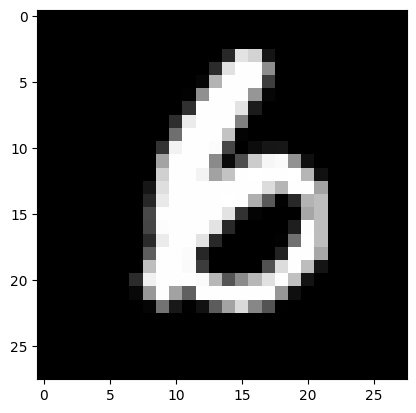

Prediction: [3]
Label: 3


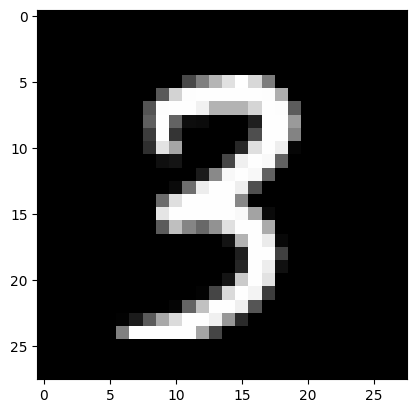

Prediction: [4]
Label: 4


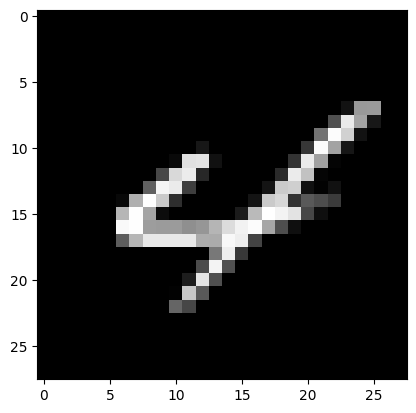

In [19]:
test_prediction(0, hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases)
test_prediction(1, hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases)
test_prediction(2, hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases)


In [20]:
# Validation accuracy
validation_predictions = get_predictions(forward_propagation(hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases, validation_features)[3])
print("Validation Accuracy:", calculate_accuracy(validation_predictions, validation_labels))

Validation Accuracy: 0.855
